In [2]:
import nltk

In [18]:
#nltk.download_shell()

### WE will be classifying sms messages 
- as spam or ham (normal)

In [19]:
import zipfile

In [20]:
zip_obj = zipfile.ZipFile("resources/smsspamcollection.zip", mode="r")

In [21]:
zip_obj.extractall("resources/")

In [40]:
message = [line.rstrip() for line in open("resources/SMSSpamCollection", mode="r")]

In [43]:
message[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [47]:
for mess_ind, mess in enumerate(message[:10]):
    print(mess_ind, mess)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

### sthis is a tab seperation files 
- WE can take advantage of pandas

In [48]:
import pandas as pd

In [50]:
message_df = pd.read_csv("resources/SMSSpamCollection", sep="\t", names=["label", "message"])

In [51]:
message_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### lets do some analysis of the message data

In [52]:
message_df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
message_df.groupby("label").describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

## Feature  engineering

In [56]:
message_df['length'] = message_df["message"].apply(len)

In [57]:
message_df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

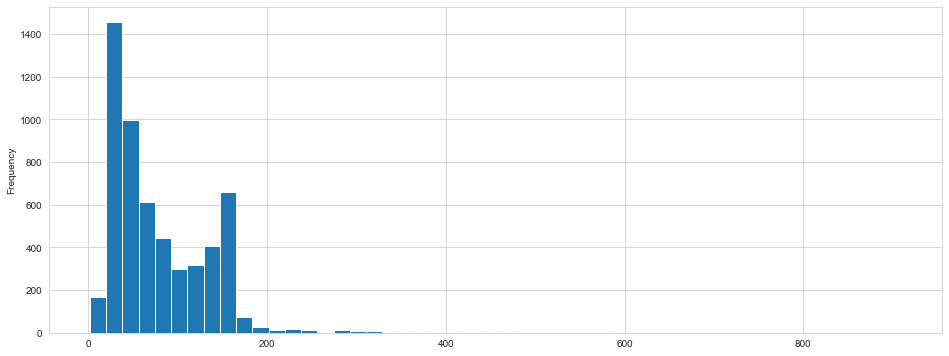

In [65]:
message_df["length"].plot(kind = "hist", figsize = (16,6), bins = 50)

In [67]:
message_df["length"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [73]:
message_df[message_df["length"] > 900]["message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

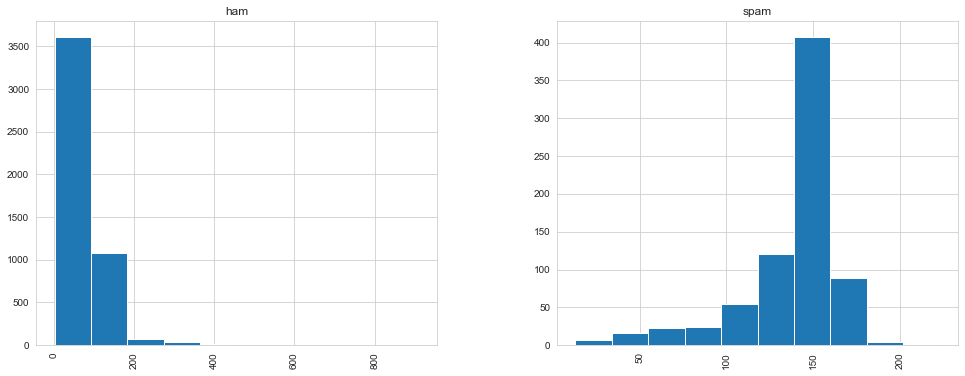

In [77]:
message_df.hist(column="length", by = "label", figsize = (16,6));

## using bag of words 
- Converting characters into vectors
- goving each character a numerical value

In [79]:
import string

### WE want to use the string library as well as the sstop words libraryto remove punctionality as well as works like and the etc

In [80]:
mess = 'stop. the and !'

In [83]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [85]:
no_punc = [c for c in mess if c not in string.punctuation]

In [86]:
no_punc

['s', 't', 'o', 'p', ' ', 't', 'h', 'e', ' ', 'a', 'n', 'd', ' ']

### no lets see how we can remove stop words
- import englis  stop words from nltk
- common words that we use so commonly that they eill not be of much help to distinguish betwen spam and ham

In [87]:
from nltk.corpus import stopwords

In [88]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
no_punc = ''.join(no_punc)

In [91]:
no_punc

'stop the and '

In [92]:
no_punc.split()

['stop', 'the', 'and']

In [95]:
no_punc

'stop the and '

## let use the nltk to remove any stop workds

In [98]:
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words("english")]

In [99]:
clean_mess

['stop']

## Now that we have this
- lets put these ideas together and apply it to the entiew data frame

In [100]:
def text_process(mess):
    """
    Remove punction
    Remove Stop words 
    Return text with no stop words
    """
    n_punc = [x for x in mess if x not in string.punctuation]
    n_punc = "".join(n_punc)
    return [word for word in n_punc.split() if word.lower() not in stopwords.words("english")]

### Three strops to remove punctionsa and also remove common words

### convert the test strings into tokens
- Tokens are words we want

In [104]:
message_df["message"].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Stemming -> reduce words repetition - run running 

### Vectorization
- COnvert each mesage to vecto so skleern ml can understand
- bag of wors model -> cound how many times a word repeats, (term frequency) , inverse doc frequncy -frequent tokens get lower weights, Normalize Vecrtor -> L2 norm -> unit length to abstract from original text length

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message_df["message"])

In [112]:
print(len(bow_transformer.vocabulary_))

11425


In [113]:
mess_4 = message_df["message"][3]

In [114]:
print(mess_4)

U dun say so early hor... U c already then say...


In [117]:
bow_4 = bow_transformer.transform([mess_4])

In [118]:
print(bow_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
